In [1]:
import tweepy
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
consumer_key = "Ntzfq9VywWHhP9jOc2G3aBTBw"
consumer_secret = "SVtfHFdv1HTGe9ejpxhT4Lv8bz9ip0lHIP1vZoGX52IgzDwO41"
access_token = "4043202390-0pG6FpyzULAAjDg0jKgAr5iNOrS6UAwk8DJlcJx"
access_token_secret = "zgAIk2ZaafnSrmb1V6WuDwCdzPvDDQVPQx99CUdSzQbmt"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
overall = pd.DataFrame() 
sources = ["CNN", "BBC", "NYTimes", "CBS", "Fox"]
tweet_number = 100

for source in sources :
    news = []
    pos = []
    neu = []
    neg = []
    comp = []
    date = []
    tweets_ago = []
    
    public_tweets = api.user_timeline(source, count=tweet_number)

    i = 0
    for tweet in public_tweets:
        text = tweet["text"]
        news.append(tweet['user']['screen_name'])
        pos.append(analyzer.polarity_scores(text)["pos"])
        neu.append(analyzer.polarity_scores(text)["neu"])
        neg.append(analyzer.polarity_scores(text)["neg"])
        comp.append(analyzer.polarity_scores(text)["compound"])
        date.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y"))
        tweets_ago.append(i)
        i = i-1

        
    data = pd.DataFrame({"Media": news,
                         "Positive score": pos,
                         "Neutral score": neu,
                         "Negative score": neg,
                         "Compound score": comp,
                         "Date Created": date,
                         "Tweets Ago":tweets_ago})

    overall = pd.concat([overall,data], axis=0) 

In [4]:
overall.to_csv("Media_Tweet_Analysis.csv")

In [5]:
CNN = overall.loc[overall["Media"]=="CNN"]
Fox = overall.loc[overall["Media"]=="fox"]
BBC = overall.loc[overall["Media"]=="BBC"]
NYT = overall.loc[overall["Media"]=="nytimes"]
CBS = overall.loc[overall["Media"]=="CBS"]

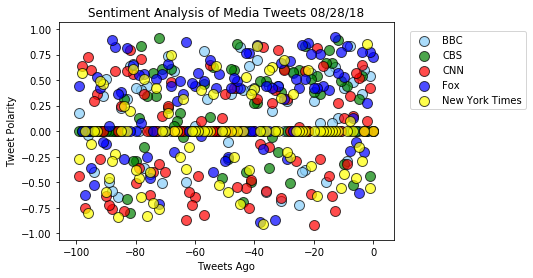

In [10]:
plt.scatter(BBC["Tweets Ago"], BBC["Compound score"], alpha=0.7, edgecolors="black", s=100, color = "lightskyblue")
plt.scatter(CBS["Tweets Ago"], CBS["Compound score"], alpha=0.7, edgecolors="black", s=100, color = "green")
plt.scatter(CNN["Tweets Ago"], CNN["Compound score"], alpha=0.7, edgecolors="black", s=100, color = "red")
plt.scatter(Fox["Tweets Ago"], Fox["Compound score"], alpha=0.7, edgecolors="black", s=100, color = "b")
plt.scatter(NYT["Tweets Ago"], NYT["Compound score"], alpha=0.7, edgecolors="black", s=100, color = "yellow")

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(["BBC", "CBS", "CNN", "Fox", "New York Times"], loc=(1.05,0.6))
plt.title ("Sentiment Analysis of Media Tweets 08/28/18")
plt.savefig("Twitter_scatter.png")

In [7]:
means = overall.groupby("Media").mean()
means

,Positive score,Neutral score,Negative score,Compound score,Tweets Ago
Media,,,,,
BBC,0.08151,0.88149,0.03702,0.106859,-49.5
CBS,0.07962,0.88855,0.03183,0.126417,-49.5
CNN,0.07994,0.83937,0.08069,-0.014418,-49.5
fox,0.21798,0.72598,0.05600,0.262446,-49.5
nytimes,0.05637,0.87665,0.06700,-0.033699,-49.5


In [8]:
means["Compound score"]

Media
BBC        0.106859
CBS        0.126417
CNN       -0.014418
fox        0.262446
nytimes   -0.033699
Name: Compound score, dtype: float64

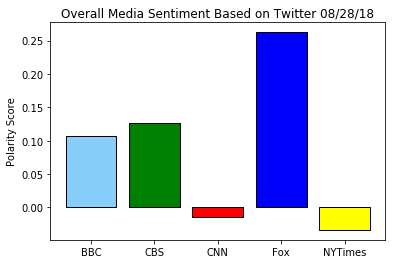

In [9]:
plt.bar(["BBC", "CBS", "CNN", "Fox", "NYTimes"],means["Compound score"], color=["lightskyblue", "green", "red","b", "yellow"], edgecolor="black")
plt.ylabel("Polarity Score")
plt.title ("Overall Media Sentiment Based on Twitter 08/28/18")
plt.savefig("Polarity_bar_plot.png")

Trends
----------------------------
1. Fox stands out as being much more positive than the other four news sources

2. On the whole, most tweets by all networks are neutral. The 0 is the most common polarity score and all networks average polarity score is closer to pure neutrality (0) than it is pure negative (-1) or pure positive (+1)

3. No obvious pattern in tweet order